In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math

In [2]:
#ESERCIZIO 2

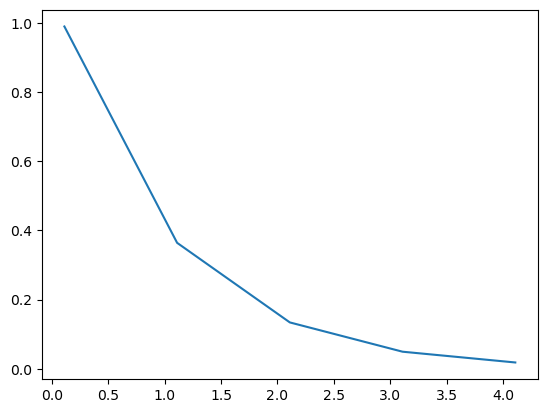

In [3]:
#2.4 Grafico della densità di probabilità di una esponenziale di parametro 0.1
nu = 0.1
y = st.expon(nu)
x = np.arange(y.ppf(0.01),y.ppf(0.99))
plt.plot(x,y.pdf(x))
plt.show()

In [4]:
#ESERCIZIO 3

In [5]:
cars = pd.read_csv('carsharing.csv', sep = ';', decimal = ',')
cars

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
387,996,FRAME C,0,-1,12.5,13.1
388,996,FRAME A,0,1,14.5,17.0
389,996,FRAME C,0,-1,9.8,17.8
390,997,FRAME B,1,-1,1.8,4.0


In [6]:
#3.1 Quanti casi contiene il file?
len(cars)

392

In [7]:
#3.2 Analizziamo l'uso del car sharing nelle diverse fasce orarie e negli orari di maggior o minor traffico

In [10]:
#3.2.1 TimeFrame è nominale, ordinale o scalare? Giustificate
print(cars.TimeFrame)
print('TimeFrame è quantitativo ordinale.')

0      FRAME D
1      FRAME D
2      FRAME D
3      FRAME D
4      FRAME B
        ...   
387    FRAME C
388    FRAME A
389    FRAME C
390    FRAME B
391    FRAME C
Name: TimeFrame, Length: 392, dtype: object
TimeFrame è quantitativo ordinale.


In [11]:
#3.2.2 In quante fasce orarie è stata suddivisa la giornata?
len(cars.TimeFrame.unique())

5

In [12]:
#3.2.3 In quali fasce orarie il servizio di car sharing è stato maggiormente usato?
cars.TimeFrame.mode()

0    FRAME B
Name: TimeFrame, dtype: object

In [13]:
#3.2.4 Tabella delle frequenze congiunte di TimeFrame e RushHour
fasce_rh = pd.crosstab(index = cars.TimeFrame,
                      columns = cars.RushHour)
fasce_rh

RushHour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


In [14]:
#3.2.5 Quali sono le fasce orarie corrispondenti agli orari di punta? (leggi tabella)
print('Leggendo la tabella di sopra, le fasce orarie corrispondenti agli orari di punta sono la B e la D.')

Leggendo la tabella di sopra, le fasce orarie corrispondenti agli orari di punta sono la B e la D.


In [15]:
#3.3 Consideriamo ora i clienti Premium (Premium = 1)

In [16]:
#3.3.1 Quanti sono?
len(cars[cars['PremiumCustomer'] == 1])

227

In [17]:
#3.3.2 Stima distanza media percorsa da un cliente Premium
cars[cars['PremiumCustomer'] == 1]['Distance'].mean()

8.437444933920705

In [20]:
#3.3.3 Stima probabilità p che un nuovo cliente si iscriva al programma Premium
cars.PremiumCustomer.mean()

0.15816326530612246

In [21]:
#3.3.4 Che stimatore avete usato al punto precedente?
print('La media campionaria')

La media campionaria


In [23]:
#3.3.5 Approssimazione probabilità di compiere nella stima di p un errore al più uguale a 0.05
Z = st.norm()
2*Z.cdf(0.05*math.sqrt(len(cars[cars['PremiumCustomer'] == 1]))/cars.PremiumCustomer.std())-1

0.5591053442021559

In [24]:
#3.4 Ritorniamo a considerare il dataset completo e consideriamo la distanza percorsa (Distance)

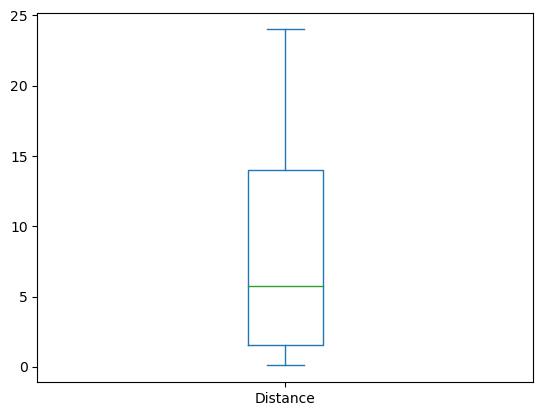

In [25]:
#3.4.1 Tracciare il boxplot del carattere
cars.Distance.plot.box()
plt.show()

In [31]:
'''
3.4.2 In base ai risultati del punto di prima, calcolate gli indici di centralità e dispersione che 
meglio caratterizzano la distanza percorsa
'''
print(cars.Distance.describe())
print('median:',cars.Distance.median())
print('range interquantile:',cars.Distance.quantile(0.75) - cars.Distance.quantile(0.25))

count    392.000000
mean       7.858673
std        6.805123
min        0.100000
25%        1.575000
50%        5.750000
75%       14.025000
max       24.000000
Name: Distance, dtype: float64
median: 5.75
range interquantile: 12.45


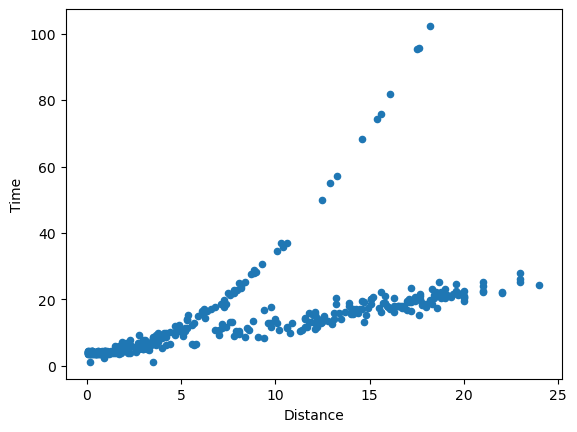

Lo scatter plot evidenzia una doppia relazione: una di tipo abbastanza diretto e una non propriamente diretta, per cui si può
dire che non vi è alcun tipo di relazione tra i due attributi.
0.6273992247694647
Indice di correlazione non molto prossimo a 1 o -1 conferma tale ipotesi.


In [34]:
#3.4.3-4 Vi è una qualche relazione tra distanza percorsa e tempo impiegato?
cars.plot.scatter('Distance', 'Time')
plt.show()
print('Lo scatter plot evidenzia una doppia relazione: una di tipo abbastanza diretto e una non propriamente diretta, per cui si può\ndire che non vi è alcun tipo di relazione tra i due attributi.')
print(cars.Distance.corr(cars.Time))
print('Indice di correlazione non molto prossimo a 1 o -1 conferma tale ipotesi.')

In [37]:
#3.5 Analizziamo ora la distanza percorsa in ogni uso del servizio negli orari di punta
cars_rh = cars[cars['RushHour'] == 1]

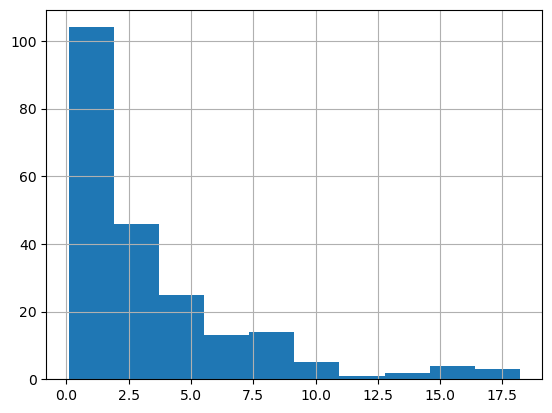

In [39]:
#3.5.1 Grafico rappresentativo della distanza percorsa negli orari di punta
cars_rh.Distance.hist()
plt.show()

In [41]:
#3.5.2 è plausibile che la distanza negli orari di punta segua una legge normale? 
print('L istogramma prodotto prima evidenzia come i valori di distanza negli orari di punta non assumono la forma a campana che\ncaratterizza le distribuzioni normali, per cui non è assimilabile ad un modello normale.')
print(cars_rh.Distance.mean(), cars_rh.Distance.median())
print('I valori di media e mediana non simili confermano tale ipotesi.')

L istogramma prodotto prima evidenzia come i valori di distanza negli orari di punta non assumono la forma a campana che
caratterizza le distribuzioni normali, per cui non è assimilabile ad un modello normale.
3.3193548387096796 2.1
I valori di media e mediana non simili confermano tale ipotesi.


In [42]:
#3.5.3 Stimare valore atteso e deviazione standard della distanza negli orari di punta
print(cars_rh.Distance.mean(), cars_rh.Distance.std())

3.3193548387096796 3.711106147915895


In [44]:
#3.5.4 Esiste un modello probabilistico per la distanza percorsa negli orari di punta?
print('Osservando l istogramma prodotto prima, si nota come esso assuma un decadimento di tipo esponenziale, il quale caratterizza le distribuzioni esponenziali: per cui è plausibile assimilare la distanza percorsa negli orari di punta ad un modello\nesponenziale.')

Osservando l istogramma prodotto prima, si nota come esso assuma un decadimento di tipo esponenziale, il quale caratterizza le distribuzioni esponenziali: per cui è plausibile assimilare la distanza percorsa negli orari di punta ad un modello
esponenziale.


In [46]:
#3.5.5 Le stime di valore atteso e dev std prodotte prima confermano l'ipotesi al punto precedente?
print('I valori molto simili di valore atteso e deviazione standard confermano l ipotesi di un modello esponenziale, poichè in un\nmodello esponenziale valore atteso e deviazione standard coincidono o comunque sono molto simili.')

I valori molto simili di valore atteso e deviazione standard confermano l ipotesi di un modello esponenziale, poichè in un
modello esponenziale valore atteso e deviazione standard coincidono o comunque sono molto simili.
